# Cifar classification Optimized

##### CNN classification

* The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
* This dataset was retirved from: ["https://www.tensorflow.org/datasets/catalog/cifar10"]

### Import Packages

In [1]:
# Linear Algebra
import numpy as np # 
# Data Processing
import pandas as pd 
# Data Visualization
import matplotlib.pyplot as plt

### Convolutional Packages

In [2]:
# Keras API
from tensorflow import keras
# Utils for categorical values
from tensorflow.keras.utils import to_categorical
# Regularizers
from tensorflow.keras import regularizers
# Sequentials
from tensorflow.keras.models import Sequential
# Model Layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
# Dataset
from tensorflow.keras.datasets import cifar10
# Image Generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 
from tensorflow.keras.callbacks import ModelCheckpoint

### Loading Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


### Getting Shape

In [4]:
x_train.shape

(50000, 32, 32, 3)

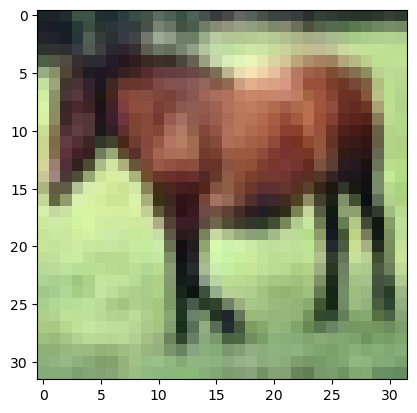

In [5]:
plt.imshow(x_train[7])
plt.show()

### Data Cleaning

In [6]:
# Let's apply Dimensionality Reduction
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
# Now! Let's move on Label's Restructuring

# Matrix Lengths with 10 possible unique values
num_clases = len(np.unique(y_train))
# Let's switch them into binary values
y_train = to_categorical(y_train, num_clases)
y_test = to_categorical(y_test, num_clases)

### Outcome Checkpoint:

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### Normalization Procedure

In [9]:
mean = np.mean(x_train)
std = np.std(x_train)

In [10]:
x_train = (x_train - mean) / (std+1e-7)
x_test = (x_test - mean) / (std+1e-7)

### Building Dataset

In [11]:
# Traning & Validating Datasets Segmentation for x
(x_train, x_valid) = x_train[5000:], x_train[:5000]
# Traning & Validating Datasets for
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Let check x_train shape
print('x_train shape', x_train.shape)

# Lets extend it amog the rest of attributes
print('train;', x_train.shape[0])
# x_valid
print('val;', x_valid.shape[0])
# x_test
print('test;', x_test.shape[0])

x_train shape (45000, 32, 32, 3)
train; 45000
val; 5000
test; 10000


### Building Model

In [12]:
# let's set a filter base
filter_base = 32
# let's add a weight on regularizer
w_regulatizer = 1e-4

### Setting The Model Up

In [13]:
# Invoke Model Type
model = Sequential()

# 1st Convolution
model.add(Conv2D(filter_base, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer), input_shape=x_train.shape[1:]))
# Activation layer
model.add(Activation('relu'))
# Batch Normalization
model.add(BatchNormalization())


# 2nd Convolution
model.add(Conv2D(filter_base, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
# Activation layer
model.add(Activation('relu'))
# Batch Normalization
model.add(BatchNormalization())
# Complexity Reduction
model.add(MaxPooling2D(pool_size=(2,2)))
# Ovewrfitting 20%
model.add(Dropout(0.2))

# In this case let's perform a deeper network


# 3rd Convolution
model.add(Conv2D(2*filter_base, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
# Activation layer
model.add(Activation('relu'))
# Batch Normalization
model.add(BatchNormalization())
# Complexity Reduction
model.add(MaxPooling2D(pool_size=(2,2)))
# Ovewrfitting 20%
model.add(Dropout(0.2))


## 4th convlotuion
model.add(Conv2D(2*filter_base, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
# Activation layer
model.add(Activation('relu'))
# Batch Normalization
model.add(BatchNormalization())
# Complexity Reduction
model.add(MaxPooling2D(pool_size=(2,2)))
# Ovewrfitting 30%
model.add(Dropout(0.3))


# 5th Convolution
model.add(Conv2D(4*filter_base, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
# Activation Layer
model.add(Activation('relu'))
# Batch Normalization
model.add(BatchNormalization())


# 6th Convolution
model.add(Conv2D(4*filter_base, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
# Activation Layer
model.add(Activation('relu'))
# Batch Normalization
model.add(BatchNormalization())
# Complexity Reduction
model.add(MaxPooling2D(pool_size=(2,2)))
# overfitting 40%
model.add(Dropout(0.4))


# Flatten Classifier

# One Dimension Flatten Layer
model.add(Flatten())
# Dense Layer
model.add(Dense(num_clases,activation='softmax'))

# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

### Data Augmentation

In [14]:
datagen = ImageDataGenerator(rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True)

### Model Compilation

In [15]:
# Optimizer Library
from tensorflow.keras import optimizers

In [16]:
# Compiling the model with 
# Adam optimizer adapts to the "Net's Momentum"
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(),
             metrics=['accuracy'])

## Past Fitting Model Adjustment

In [17]:
# hist = model.fit(x_train, y_train, batch_size=32,epochs=100,
#                validation_data=(x_valid, y_valid),
#                verbose=2, shuffle=True)

### Callbacks

In [18]:
checkpoint = ModelCheckpoint('my_best_model.hdf5',verbose=1,save_best_only=True, monitor = 'val_accuracy')

### Model Training

In [19]:
# Generating Images from
hist = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                 # Callback
                 callbacks=[checkpoint],
                 # Calculate each epoch
                 steps_per_epoch=x_train.shape[0] // 128,
                 # Iterations
                 epochs=120,
                 # Single Line
                 verbose=2,
                 # Validation Dataset
                 validation_data=(x_valid, y_valid))

Epoch 1/120


2023-03-16 20:26:05.492706: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 1: val_accuracy improved from -inf to 0.27120, saving model to my_best_model.hdf5
351/351 - 35s - loss: 2.1990 - accuracy: 0.3171 - val_loss: 2.2573 - val_accuracy: 0.2712 - 35s/epoch - 99ms/step
Epoch 2/120

Epoch 2: val_accuracy improved from 0.27120 to 0.44680, saving model to my_best_model.hdf5
351/351 - 23s - loss: 1.6624 - accuracy: 0.4310 - val_loss: 1.7143 - val_accuracy: 0.4468 - 23s/epoch - 64ms/step
Epoch 3/120

Epoch 3: val_accuracy improved from 0.44680 to 0.55600, saving model to my_best_model.hdf5
351/351 - 23s - loss: 1.4700 - accuracy: 0.4919 - val_loss: 1.2742 - val_accuracy: 0.5560 - 23s/epoch - 67ms/step
Epoch 4/120

Epoch 4: val_accuracy did not improve from 0.55600
351/351 - 24s - loss: 1.3380 - accuracy: 0.5394 - val_loss: 1.4009 - val_accuracy: 0.5346 - 24s/epoch - 67ms/step
Epoch 5/120

Epoch 5: val_accuracy improved from 0.55600 to 0.57500, saving model to my_best_model.hdf5
351/351 - 22s - loss: 1.2479 - accuracy: 0.5710 - val_loss: 1.3239 - val_accura

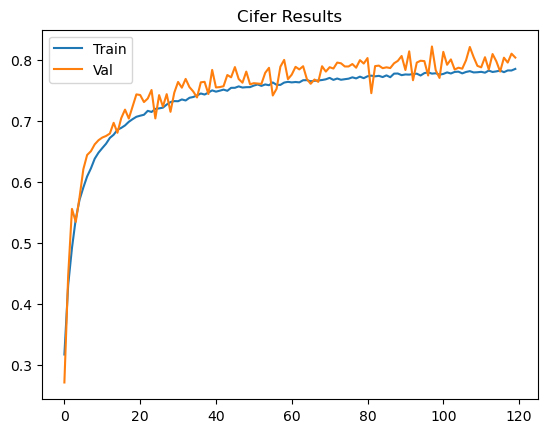

In [20]:
# Training Accuracy
plt.plot(hist.history['accuracy'],label='Train')
# Validation Accuracy
plt.plot(hist.history['val_accuracy'],label='Val')
# Title
plt.title('Cifer Results')
# Visualization Legend
plt.legend()
plt.show()

# Outcome Evaluation

In [21]:
model2 = model

In [22]:
model2.load_weights('/kaggle/working/my_best_model.hdf5')

In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7107 - accuracy: 0.8078


[0.7107429504394531, 0.8077999949455261]

#### After perform an evaluation to this Convolutional Neural Network a 79% was achieved. The model could improve if Epochs increase or even restate the Learning Rate